# Gravitational Lensing Simulation

This experiment simulates gravitational lensing — the bending of light caused by a massive object like a black hole or a galaxy.  
The simulation shows how a background galaxy appears distorted due to the gravitational field of the massive object.

Inspired by general relativity and the Einstein ring effect.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from IPython.display import HTML

In [2]:
# Image size
width, height = 400, 400
center_x, center_y = width // 2, height // 2

# Gravitational lens parameters
lens_mass = 5  # Arbitrary units
einstein_radius = 60  # Pixels (affects strength of lensing)

def draw_galaxy(draw, x, y, color="white", size=3):
    """Draw a small star or point representing a galaxy."""
    draw.ellipse([x - size, y - size, x + size, y + size], fill=color)

In [3]:
def gravitational_lens(x, y, center_x, center_y, radius):
    """Apply a simple gravitational lensing effect centered on (center_x, center_y)."""
    dx = x - center_x
    dy = y - center_y
    r = np.sqrt(dx**2 + dy**2)

    if r == 0:
        return x, y  # Avoid division by zero

    # Deflection (simplified Einstein ring approximation)
    deflection = radius / r

    # Apply lensing: shift position by deflection scaled vector
    lensed_x = x + deflection * dx
    lensed_y = y + deflection * dy

    return int(lensed_x), int(lensed_y)

In [4]:
# Create a blank canvas
image = Image.new("RGB", (width, height), "black")
draw = ImageDraw.Draw(image)

# Generate random background galaxies
num_galaxies = 300
np.random.seed(0)

for _ in range(num_galaxies):
    x = np.random.randint(0, width)
    y = np.random.randint(0, height)

    # Apply gravitational lensing
    lensed_x, lensed_y = gravitational_lens(x, y, center_x, center_y, einstein_radius)
    
    # Draw original and lensed galaxies
    draw_galaxy(draw, lensed_x, lensed_y, color="cyan", size=1)

# Highlight the lens object
draw_galaxy(draw, center_x, center_y, color="red", size=4)

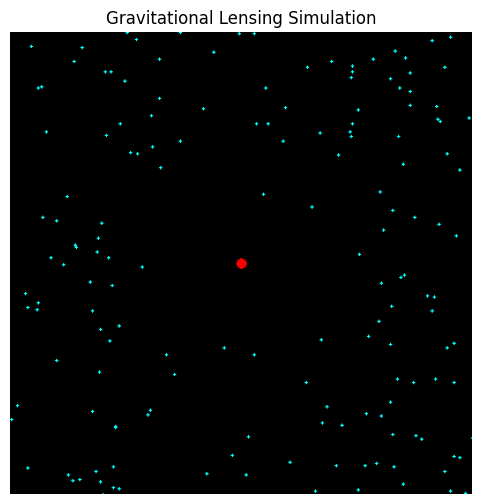

In [5]:
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Gravitational Lensing Simulation")
plt.show()

In [6]:
from matplotlib import animation

In [7]:
# Generate static galaxy positions
num_galaxies = 300
np.random.seed(0)
galaxy_positions = np.random.randint(0, min(width, height), size=(num_galaxies, 2))

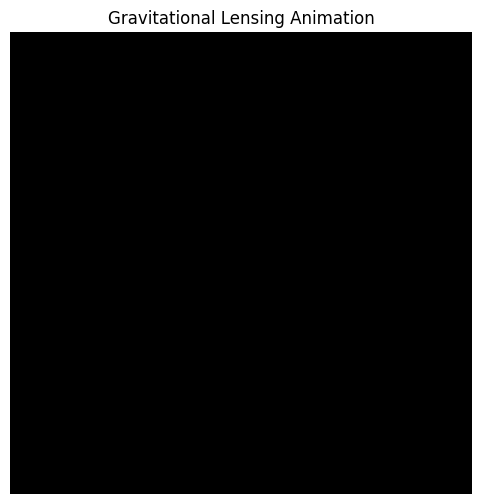

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
img = ax.imshow(np.zeros((height, width, 3), dtype=np.uint8))
ax.axis('off')
ax.set_title("Gravitational Lensing Animation")

def update(frame):
    # Create a new image for each frame
    image = Image.new("RGB", (width, height), "black")
    draw = ImageDraw.Draw(image)

    # Move galaxies slowly to simulate background shift
    for i, (x, y) in enumerate(galaxy_positions):
        # Shift x position based on frame (looping)
        shift = (frame // 2 + i) % width
        new_x = (x + shift) % width
        new_y = y

        lensed_x, lensed_y = gravitational_lens(new_x, new_y, center_x, center_y, einstein_radius)
        draw_galaxy(draw, lensed_x, lensed_y, color="cyan", size=1)

    # Highlight the lens object
    draw_galaxy(draw, center_x, center_y, color="red", size=4)

    # Convert PIL image to NumPy array
    img_array = np.array(image)
    img.set_data(img_array)
    return [img]

In [10]:
ani = animation.FuncAnimation(
    fig,
    update,
    frames=60,
    interval=150,
    blit=True,
    repeat=True
)

HTML(ani.to_jshtml())

In [11]:
import ipywidgets as widgets
from IPython.display import display

In [12]:
center_x_slider = widgets.IntSlider(value=center_x, min=0, max=width, step=1, description='Lens X:')
center_y_slider = widgets.IntSlider(value=center_y, min=0, max=height, step=1, description='Lens Y:')
einstein_radius_slider = widgets.FloatSlider(value=einstein_radius, min=1, max=100, step=1, description='Einstein R:')

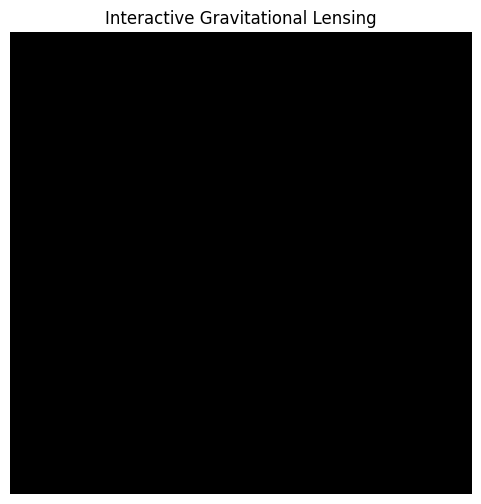

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
img = ax.imshow(np.zeros((height, width, 3), dtype=np.uint8))
ax.axis('off')
ax.set_title("Interactive Gravitational Lensing")

def interactive_update(frame):
    cx = center_x_slider.value
    cy = center_y_slider.value
    radius = einstein_radius_slider.value

    image = Image.new("RGB", (width, height), "black")
    draw = ImageDraw.Draw(image)

    for i, (x, y) in enumerate(galaxy_positions):
        shift = (frame // 2 + i) % width
        new_x = (x + shift) % width
        new_y = y

        lensed_x, lensed_y = gravitational_lens(new_x, new_y, cx, cy, radius)
        draw_galaxy(draw, lensed_x, lensed_y, color="cyan", size=1)

    draw_galaxy(draw, cx, cy, color="red", size=4)

    img_array = np.array(image)
    img.set_data(img_array)
    return [img]

In [14]:
ani = animation.FuncAnimation(
    fig,
    interactive_update,
    frames=60,
    interval=150,
    blit=True,
    repeat=True
)

display(center_x_slider, center_y_slider, einstein_radius_slider)
HTML(ani.to_jshtml())

IntSlider(value=200, description='Lens X:', max=400)

IntSlider(value=200, description='Lens Y:', max=400)

FloatSlider(value=60.0, description='Einstein R:', min=1.0, step=1.0)